In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_deliveries = pd.read_csv('deliveries.csv')

df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
df_deliveries.shape

(179078, 21)

In [4]:
df_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [5]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [6]:
df_deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [7]:
df_deliveries.duplicated().sum()

23

In [8]:
cols = ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder']
df_deliveries.duplicated(subset = cols).sum()

23

In [9]:
dups = df_deliveries.duplicated(subset = cols, keep = False)

In [10]:
dups

0         False
1         False
2         False
3         False
4         False
          ...  
179073    False
179074    False
179075    False
179076    False
179077    False
Length: 179078, dtype: bool

In [11]:
df_deliveries[dups]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
52169,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
52178,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
162803,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,4,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
162804,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,5,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
162805,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,4,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
162806,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,5,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
162863,7946,1,Rajasthan Royals,Royal Challengers Bangalore,13,5,RA Tripathi,AM Rahane,YS Chahal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
162870,7946,1,Rajasthan Royals,Royal Challengers Bangalore,13,5,RA Tripathi,AM Rahane,YS Chahal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
162963,7946,2,Royal Challengers Bangalore,Rajasthan Royals,10,1,AB de Villiers,Mandeep Singh,I Sodhi,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
162964,7946,2,Royal Challengers Bangalore,Rajasthan Royals,10,1,AB de Villiers,Mandeep Singh,I Sodhi,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [12]:
df_deliveries = df_deliveries.drop_duplicates()

In [13]:
df_deliveries.duplicated().sum()

0

In [14]:
df_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [15]:
df_matches = pd.read_csv('matches.csv')

df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [16]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [17]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [18]:
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [19]:
df_matches.duplicated().sum()

0

In [20]:
cols = ['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3']
df_matches.duplicated(subset = cols).sum()

0

In [21]:
df_matches.duplicated().sum()

0

In [22]:
merged_data = pd.merge(df_deliveries, df_matches, left_on='match_id', right_on='id', how='inner')

In [23]:
merged_data.duplicated().sum()

0

### 1. Which of the following is the right way to merge 2 datasets for getting better insights from the data

In [24]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179055 entries, 0 to 179054
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179055 non-null  int64 
 1   inning            179055 non-null  int64 
 2   batting_team      179055 non-null  object
 3   bowling_team      179055 non-null  object
 4   over              179055 non-null  int64 
 5   ball              179055 non-null  int64 
 6   batsman           179055 non-null  object
 7   non_striker       179055 non-null  object
 8   bowler            179055 non-null  object
 9   is_super_over     179055 non-null  int64 
 10  wide_runs         179055 non-null  int64 
 11  bye_runs          179055 non-null  int64 
 12  legbye_runs       179055 non-null  int64 
 13  noball_runs       179055 non-null  int64 
 14  penalty_runs      179055 non-null  int64 
 15  batsman_runs      179055 non-null  int64 
 16  extra_runs        179055 non-null  int

In [25]:
merged_data.shape

(179055, 39)

In [26]:
merged_data.isnull().any(axis=0)

match_id            False
inning              False
batting_team        False
bowling_team        False
over                False
ball                False
batsman             False
non_striker         False
bowler              False
is_super_over       False
wide_runs           False
bye_runs            False
legbye_runs         False
noball_runs         False
penalty_runs        False
batsman_runs        False
extra_runs          False
total_runs          False
player_dismissed     True
dismissal_kind       True
fielder              True
id                  False
season              False
city                 True
date                False
team1               False
team2               False
toss_winner         False
toss_decision       False
result              False
dl_applied          False
winner               True
win_by_runs         False
win_by_wickets      False
player_of_match      True
venue               False
umpire1              True
umpire2              True
umpire3     

In [27]:
missing_values_count = merged_data.isnull().sum()

In [28]:
column_most_missing = missing_values_count.idxmax()
max_missing_values = missing_values_count.max()

print(f"The column with the most missing values is '{column_most_missing}' with {max_missing_values} missing values.")

The column with the most missing values is 'fielder' with 172607 missing values.


### 3. City which hosted most number of seasons according to the data is:


In [29]:
city_season_count = df_matches.groupby('city')['season'].nunique()

city_most_seasons = city_season_count.idxmax()
max_seasons_hosted = city_season_count.max()

print(f"The city that hosted the most number of seasons is '{city_most_seasons}' with {max_seasons_hosted} unique seasons.")

The city that hosted the most number of seasons is 'Delhi' with 11 unique seasons.


### 4. Which year has the most number of matches played?

In [30]:
matches_per_year = df_matches['season'].value_counts()

year_most_matches = matches_per_year.idxmax()
max_matches = matches_per_year.max()

print(f"The year with the most number of matches played is '{year_most_matches}' with {max_matches} matches.")

The year with the most number of matches played is '2013' with 76 matches.


### 5. Maximum wins by Mumbai Indians in 2011 are


In [31]:
mi_2011_matches = df_matches[(df_matches['season'] == 2011) & ((df_matches['team1'] == 'Mumbai Indians') | (df_matches['team2'] == 'Mumbai Indians'))]

mi_wins_2011 = mi_2011_matches[mi_2011_matches['winner'] == 'Mumbai Indians']['winner'].count()

print(f"The maximum wins by Mumbai Indians in 2011 are: {mi_wins_2011}")

The maximum wins by Mumbai Indians in 2011 are: 10


### 6. For 'toss_decision' feature what kind of plot is suitable?


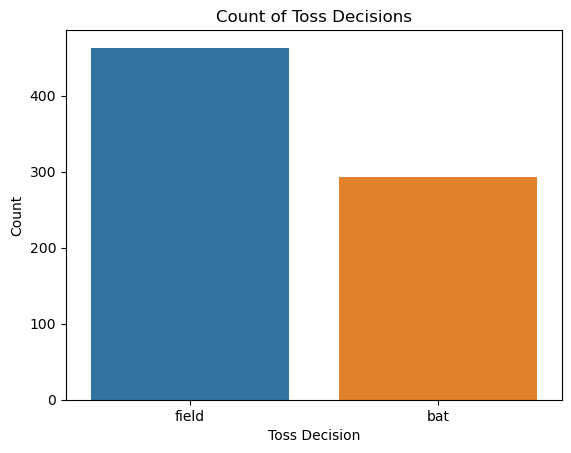

In [32]:
sns.countplot(x='toss_decision', data=df_matches)
plt.title('Count of Toss Decisions')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.show()

### 7.  What is the percentage of getting bat and field in feature 'toss_descision'?

In [33]:
toss_decision_counts = df_matches['toss_decision'].value_counts()

total_decisions = toss_decision_counts.sum()
percentage_bat = (toss_decision_counts['bat'] / total_decisions) * 100
percentage_field = (toss_decision_counts['field'] / total_decisions) * 100

print(f"Percentage of 'bat' decision: {percentage_bat:.2f}%")
print(f"Percentage of 'field' decision: {percentage_field:.2f}%")

Percentage of 'bat' decision: 38.76%
Percentage of 'field' decision: 61.24%


### 8.  Which statement holds true

In [34]:
field_wins = df_matches[(df_matches['toss_winner'] == df_matches['winner']) & (df_matches['toss_decision'] == 'field')]['winner'].count()

bat_wins = df_matches[(df_matches['toss_winner'] == df_matches['winner']) & (df_matches['toss_decision'] == 'bat')]['winner'].count()

if field_wins > bat_wins:
    print("Statement A holds true: Teams winning tosses and electing field first have won more number of matches.")
elif bat_wins > field_wins:
    print("Statement B holds true: Teams winning tosses and electing bat first have won more number of matches.")
else:
    print("Both statements A and B are equal or there might be no clear dominance between field and bat decisions after winning the toss.")

Statement A holds true: Teams winning tosses and electing field first have won more number of matches.


### 9. In which years where taking batting second have won more number of matches?

In [35]:
batting_second_wins = df_matches[df_matches['toss_decision'] == 'field']['winner'].value_counts()

years_with_more_batting_second_wins = batting_second_wins.groupby(df_matches['season']).sum().idxmax()

print(f"In the year(s) {years_with_more_batting_second_wins}, teams batting second have won more matches.")

ValueError: attempt to get argmax of an empty sequence

In [36]:
batting_second_matches = df_matches[df_matches['toss_decision'] == 'field']

if not batting_second_matches.empty:
    batting_second_wins_by_season = batting_second_matches[batting_second_matches['winner'] == batting_second_matches['team2']]['season'].value_counts()

    years_with_more_batting_second_wins = batting_second_wins_by_season.idxmax()

    print(f"In the year(s) {years_with_more_batting_second_wins}, teams batting second have won more matches.")
else:
    print("No matches found where teams chose to bat second.")
    

In the year(s) 2016, teams batting second have won more matches.


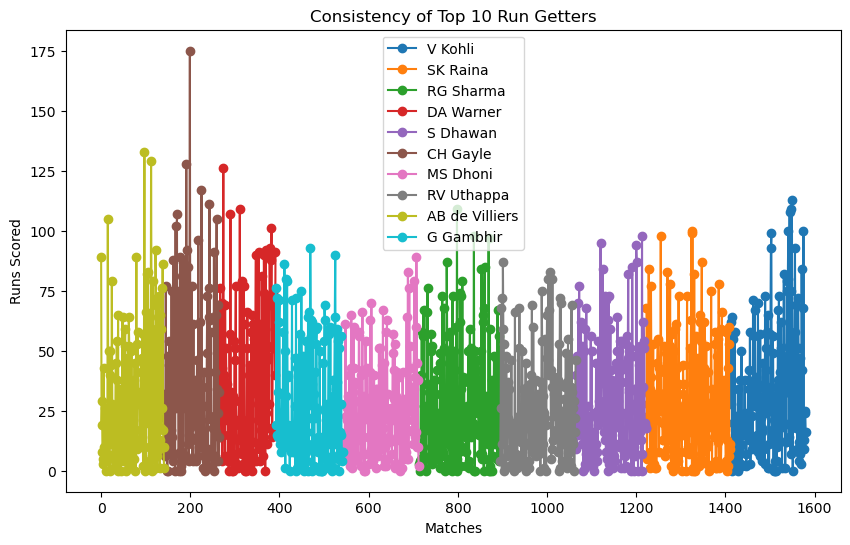

In [37]:
batsmen_runs = df_deliveries.groupby('batsman')['batsman_runs'].sum().reset_index()

top_10_run_getters = batsmen_runs.nlargest(10, 'batsman_runs')

top_10_data = df_deliveries[df_deliveries['batsman'].isin(top_10_run_getters['batsman'])]

batsman_match_runs = top_10_data.groupby(['batsman', 'match_id'])['batsman_runs'].sum().reset_index()

plt.figure(figsize=(10, 6))

for batsman in top_10_run_getters['batsman']:
    batsman_data = batsman_match_runs[batsman_match_runs['batsman'] == batsman]
    plt.plot(batsman_data.index, batsman_data['batsman_runs'], marker='o', label=batsman)

plt.title('Consistency of Top 10 Run Getters')
plt.xlabel('Matches')
plt.ylabel('Runs Scored')
plt.legend()
plt.show()

In [38]:
deliveries_2019 = df_deliveries[df_deliveries['match_id'].astype(str).str.startswith('2019')]

boundary_runs_2019 = deliveries_2019[(deliveries_2019['batsman_runs'] == 4) | (deliveries_2019['batsman_runs'] == 6)]
boundary_runs_by_batsman = boundary_runs_2019.groupby('batsman')['batsman_runs'].sum().reset_index()

batsman_highest_boundary_runs_2019 = boundary_runs_by_batsman.nlargest(1, 'batsman_runs')

print(f"The batsman who scored the highest number of runs through boundaries in 2019 is: {batsman_highest_boundary_runs_2019['batsman'].values[0]}")

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
deliveries_2019 = df_deliveries[df_deliveries['match_id'].astype(str).str.startswith('2019')]

boundary_runs_2019 = deliveries_2019[(deliveries_2019['batsman_runs'] == 4) | (deliveries_2019['batsman_runs'] == 6)]
boundary_runs_by_batsman = boundary_runs_2019.groupby('batsman')['batsman_runs'].sum().reset_index()

if not boundary_runs_by_batsman.empty:
    batsman_highest_boundary_runs_2019 = boundary_runs_by_batsman.nlargest(1, 'batsman_runs')

    print(f"The batsman who scored the highest number of runs through boundaries in 2019 is: {batsman_highest_boundary_runs_2019['batsman'].values[0]}")
else:
    print("No data available for runs scored through boundaries in 2019.")

### 12. Most number of wickets taken by a bowler is

In [39]:
dismissals = df_deliveries[df_deliveries['player_dismissed'].notnull()]

wickets_by_bowler = dismissals['bowler'].value_counts().reset_index()
wickets_by_bowler.columns = ['Bowler', 'Wickets']

most_wickets_bowler = wickets_by_bowler.iloc[0]  # Bowler with the highest number of wickets

print(f"The bowler who took the most number of wickets is {most_wickets_bowler['Bowler']} with {most_wickets_bowler['Wickets']} wickets.")

The bowler who took the most number of wickets is SL Malinga with 188 wickets.


### 13.  What is the strike rate of Kohli in 2016


In [40]:
kohli_2016 = df_deliveries[(df_deliveries['batsman'] == 'V Kohli') & (df_deliveries['match_id'].astype(str).str.startswith('2016'))]

total_runs_kohli_2016 = kohli_2016['batsman_runs'].sum()

total_balls_faced_kohli_2016 = kohli_2016.shape[0]  # Counting rows (each row represents a ball faced)

strike_rate_kohli_2016 = (total_runs_kohli_2016 / total_balls_faced_kohli_2016) * 100

print(f"Virat Kohli's strike rate in 2016 was: {strike_rate_kohli_2016:.2f}")

Virat Kohli's strike rate in 2016 was: nan


C:\Users\Vanita Deshmukh\AppData\Local\Temp\ipykernel_11700\3288569167.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  strike_rate_kohli_2016 = (total_runs_kohli_2016 / total_balls_faced_kohli_2016) * 100


In [41]:
kohli_2016 = df_deliveries[(df_deliveries['batsman'] == 'V Kohli') & (df_deliveries['match_id'].astype(str).str.startswith('2016'))]

total_runs_kohli_2016 = kohli_2016['batsman_runs'].sum()

total_balls_faced_kohli_2016 = kohli_2016.shape[0]  # Counting rows (each row represents a ball faced)

if total_balls_faced_kohli_2016 > 0:
    strike_rate_kohli_2016 = (total_runs_kohli_2016 / total_balls_faced_kohli_2016) * 100
    print(f"Virat Kohli's strike rate in 2016 was: {strike_rate_kohli_2016:.2f}")
else:
    print("No balls faced by Virat Kohli in 2016, unable to calculate strike rate.")

No balls faced by Virat Kohli in 2016, unable to calculate strike rate.


In [42]:
kohli_2016 = df_deliveries[(df_deliveries['batsman'] == 'V Kohli') & (df_deliveries['match_id'].astype(str).str.startswith('2016'))]

total_runs_kohli_2016 = kohli_2016['batsman_runs'].sum()

total_balls_faced_kohli_2016 = kohli_2016.shape[0]  # Counting rows (each row represents a ball faced)

if total_balls_faced_kohli_2016 > 0:
    strike_rate_kohli_2016 = (total_runs_kohli_2016 / total_balls_faced_kohli_2016) * 100
    print(f"Virat Kohli's strike rate in 2016 was: {strike_rate_kohli_2016:.2f}")
else:
    print("No balls faced by Virat Kohli in 2016, unable to calculate strike rate.")

No balls faced by Virat Kohli in 2016, unable to calculate strike rate.


### 14.  Bowlers with maximum number of extras:

In [43]:
extra_runs_by_bowler = df_deliveries.groupby('bowler')['extra_runs'].sum().reset_index()

max_extra_runs = extra_runs_by_bowler['extra_runs'].max()
bowlers_with_max_extras = extra_runs_by_bowler[extra_runs_by_bowler['extra_runs'] == max_extra_runs]

print("Bowlers with the maximum number of extras conceded:")
for index, row in bowlers_with_max_extras.iterrows():
    print(f"{row['bowler']} - Total Extras: {row['extra_runs']}")

Bowlers with the maximum number of extras conceded:
SL Malinga - Total Extras: 293


In [44]:
venue_matches_count = df_matches['venue'].value_counts()

most_matches_venue = venue_matches_count.idxmax()
total_matches_at_venue = venue_matches_count.max()

print(f"The venue that hosted the most number of IPL matches is '{most_matches_venue}' with {total_matches_at_venue} matches.")

The venue that hosted the most number of IPL matches is 'Eden Gardens' with 77 matches.


In [45]:
srh_rcb_2017 = df_matches[
    ((df_matches['team1'] == 'Sunrisers Hyderabad') | (df_matches['team2'] == 'Sunrisers Hyderabad')) &
    ((df_matches['team1'] == 'Royal Challengers Bangalore') | (df_matches['team2'] == 'Royal Challengers Bangalore')) &
    (df_matches['season'] == 2017)
]

if not srh_rcb_2017.empty:
    match_index = srh_rcb_2017.index[0]  # Assuming there's only one match between SRH and RCB in 2017
    player_of_match = srh_rcb_2017.loc[match_index, 'player_of_match']
    print(f"In the matches between SRH and RCB in 2017, the Player of the Match was: {player_of_match}")
else:
    print("No matches found between Sunrisers Hyderabad and Royal Challengers Bangalore in 2017.")

In the matches between SRH and RCB in 2017, the Player of the Match was: Yuvraj Singh


In [46]:
run_outs = df_deliveries[df_deliveries['dismissal_kind'] == 'run out']

batsmen_run_outs = run_outs.groupby('batsman')['dismissal_kind'].count().reset_index()
batsmen_run_outs.columns = ['Batsman', 'Run Outs']

top_three_run_out_batsmen = batsmen_run_outs.nlargest(3, 'Run Outs')

print("Top three batsmen with the most run outs across seasons:")
print(top_three_run_out_batsmen)

Top three batsmen with the most run outs across seasons:
        Batsman  Run Outs
152    MS Dhoni        21
195   RG Sharma        17
112  KD Karthik        16


In [47]:
kohli_vs_bumrah = df_deliveries[(df_deliveries['batsman'] == 'V Kohli') & (df_deliveries['bowler'] == 'JJ Bumrah')]

total_runs_kohli_vs_bumrah = kohli_vs_bumrah['batsman_runs'].sum()

print(f"The total runs scored by V Kohli against JJ Bumrah are: {total_runs_kohli_vs_bumrah}")

The total runs scored by V Kohli against JJ Bumrah are: 112


In [48]:
caught_and_bowled = df_deliveries[df_deliveries['dismissal_kind'] == 'caught and bowled']

caught_and_bowled_counts = caught_and_bowled.groupby('batsman')['dismissal_kind'].count().reset_index()
caught_and_bowled_counts.columns = ['Batsman', 'Caught and Bowled Dismissals']

max_caught_and_bowled_dismissals = caught_and_bowled_counts.nlargest(1, 'Caught and Bowled Dismissals')

print("Player dismissed the maximum number of times via 'caught and bowled' across all seasons:")
print(max_caught_and_bowled_dismissals)

Player dismissed the maximum number of times via 'caught and bowled' across all seasons:
     Batsman  Caught and Bowled Dismissals
99  SK Raina                             7


In [49]:
batsman_strike_rate = df_deliveries.groupby('batsman')['batsman_runs'].agg(['sum', 'count'])
batsman_strike_rate['strike_rate'] = (batsman_strike_rate['sum'] / batsman_strike_rate['count']) * 100

boundary_runs = df_deliveries[df_deliveries['batsman_runs'].isin([4, 6])]
boundary_count = boundary_runs.groupby('batsman')['batsman_runs'].count().reset_index()
boundary_count.columns = ['batsman', 'boundary_count']

batsman_ability = pd.merge(batsman_strike_rate, boundary_count, on='batsman')

batsman_ability['hard_hitting_ability'] = (batsman_ability['strike_rate'] * 0.6) + (batsman_ability['boundary_count'] * 0.4)

player_highest_ability = batsman_ability.nlargest(1, 'hard_hitting_ability')

print("Player with the highest hard-hitting ability:")
print(player_highest_ability[['batsman', 'hard_hitting_ability']])

Player with the highest hard-hitting ability:
     batsman  hard_hitting_ability
79  CH Gayle            368.584222
